<h1 style='text-align:center'>NoSQL - Not Only SQL</h1>

#### What's wrong with SQL? 

- SQL offers a ton of structure for storing data 
    - That structure requires data to come in, in a certain way (aka your data must have structure) 
    - Structure comes at the cost of speed 
    
    
- SQL structure is very rigid - if you want to change the schema it requires you to change all of your existing data to match the new schema 


- Large data requires distributed computing (many computers working together to accomplish the same task) - Executing distributed joins is a very complex problem in relational databases. 

#### What does NoSQL offer? 

- Schemaless − Number of fields, content and size of the data object can differ from one data object to another.
- You can store virtually any kind of data. 
- Structure of a single object is clear.
- No complex joins.
- To scale up and handle more queries, just add more machines
- You can change the schema of your database on the fly

#### Types of NoSQL Databases

<img style='width: 400px' src='images/nosql-types.png/'>

<b>Document databases</b> pair each key with a complex data structure known as a document. Documents can contain many different key-value pairs, or key-array pairs, or even nested documents.

<img  style='align: center; width:150px' src='images/mongodb.png' />
<img style='align: center;' src='images/couchdb.png' />
<img style='align: center; width: 200px' src='images/documentdb.png' />

<b>Graph stores</b> are used to store information about networks of data, such as social connections. Graph stores include Neo4J and Giraph.

<img  style='align: center; width:150px' src='images/ApacheGiraph.svg' />
<img style='align: center;' src='images/neo4j.png' />

<b>Key-value</b> stores are the simplest NoSQL databases. Every single item in the database is stored as an attribute name (or 'key'), together with its value. Examples of key-value stores are Riak and Berkeley DB. 

<b>Wide-column stores</b> such as Cassandra and HBase are optimized for queries over large datasets, and store columns of data together, instead of rows.

## What is MongoDB

MongoDB stores data in flexible, JSON-like documents, meaning fields can vary from document to document and data structure can be changed over time

<b>Data Structure</b>

Single Entry = Document

```json
{ 
  _id: ObjectId(8af37bd7891c), 
  title: 'MongoDB Lab',
  description: 'Introductory lab on how to use MongoDB',
  by: 'Flatiron School',
  topics: ['mongodb', 'database', 'NoSQL', 'JSON']  
}
```

You can embed documents inside documents! 

<img src ='images/househouse.gif' />

```json
{ 
  _id: ObjectId(8af37bd78ssc), 
  title: 'Other Lab',
  description: 'Introductory lab on how to use something',
  by: 'Flatiron School',
  topics: ['blah', 'blah', 'blah', 'blah'],
  author: {
            _id: ObjectId(83928shkjw183),
            name: 'Andy Enkeboll',
            building: 'Metropolitan Square'
          }
}
```

##### Why would we want to nest objects? 

Multiple Documents = Collection

```json
{ 
  _id: ObjectId(8af37bd7891c), 
  title: 'MongoDB Lab',
  description: 'Introductory lab on how to use MongoDB',
  by: 'Flatiron School',
  topics: ['mongodb', 'database', 'NoSQL', 'JSON']  
}, 
{ 
  _id: ObjectId(8af37bd78ssc), 
  title: 'Other Lab',
  description: 'Introductory lab on how to use something',
  by: 'Flatiron School',
  topics: ['blah', 'blah', 'blah', 'blah']  
}
```

#### Working with MongoDB

Assuming you have installed/setup mongo and pip installed pymongo...

In [121]:
import pymongo

In [122]:
client = pymongo.MongoClient("mongodb://127.0.0.1:27017/")

# grab a database from your server 
db = client['example_data']

#t his can be a new one or an existing one
# (if it doesn't exist, it will get create when you write data into it)

In [123]:
client.list_database_names()

['admin',
 'config',
 'example_data',
 'example_database',
 'local',
 'test',
 'wikipedia']

In [58]:
# initialize an empty collection - this where your 'documents' will go
coll = db['example_collection']

In [59]:
client.list_database_names()

['admin', 'config', 'example_data', 'example_database', 'local', 'test']

In [127]:
example_data = {'name': 'John Doe', 'address': '123 elm street',
                'age': 28, 'children': ['Jane', 'Joe'], 'job': 'barrista'}
coll.insert_one(example_data)

In [128]:
#get all the documents in a collection
query = coll.find({})

In [129]:
for document in query:
    print(document)

{'_id': ObjectId('5d67d4345dfeb267a41572fc'), 'name': 'bread', 'src': b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Bread - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Bread","wgTitle":"Bread","wgCurRevisionId":912941129,"wgRevisionId":912941129,"wgArticleId":36969,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Pages using web citations with no URL","Wikipedia indefinitely semi-protected pages","Articles with short description","Use dmy dates from October 2017","Pages using deprecated image syntax","Pages using multiple image with auto scaled images","Wikipedia articles with GND identifiers","Wikipedia articles with NARA iden

In [130]:
example_data_2 = [{'name': 'Andy', 'address': 'DC'},
                  {'name': 'Marisa', 'address': 'MD'},
                  {'name': 'Ammar'}
                  ]
coll.insert_many(example_data_2)

In [131]:
query_1 = coll.find({})

In [132]:
for document in query_1:
    print(document)

{'_id': ObjectId('5d67d4345dfeb267a41572fc'), 'name': 'bread', 'src': b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Bread - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Bread","wgTitle":"Bread","wgCurRevisionId":912941129,"wgRevisionId":912941129,"wgArticleId":36969,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Pages using web citations with no URL","Wikipedia indefinitely semi-protected pages","Articles with short description","Use dmy dates from October 2017","Pages using deprecated image syntax","Pages using multiple image with auto scaled images","Wikipedia articles with GND identifiers","Wikipedia articles with NARA iden

In [133]:
query_2 = coll.find({'name': 'John Doe'})

In [134]:
for document in query_2:
    try:
        print(document['job'])
    except:
        pass

barrista


In [135]:
#updating records is super easy! 
record_to_update = {'name' : 'John Doe'}
update_1 = {'$set': {'age': 29, 'birthday': '2/8/1990'}}

coll.update_many(record_to_update, update_1)

In [136]:
#searching in a list in a document
query_4 = coll.find({'children': 'Jane'})
for item in query_4:
    print(item)

{'_id': ObjectId('5d67e09e5dfeb267a41572fe'), 'name': 'John Doe', 'address': '123 elm street', 'age': 29, 'children': ['Jane', 'Joe'], 'job': 'barrista', 'birthday': '2/8/1990'}


In [137]:
#removing a key:value from a document
update_2 = {'$unset': {'birthday': ''}}

coll.update_many(record_to_update, update_2)

In [138]:
query_5 = coll.find({'name': 'John Doe'})
for item in query_5:
    print(item)

{'_id': ObjectId('5d67e09e5dfeb267a41572fe'), 'name': 'John Doe', 'address': '123 elm street', 'age': 29, 'children': ['Jane', 'Joe'], 'job': 'barrista'}


In [139]:
#delete record
test = coll.delete_one({'name' : 'John Doe'})


In [140]:
test.deleted_count

1

In [93]:
#delete all records
coll.delete_many({})

In [95]:
query_6 = coll.find({})
for doc in query_6:
    print(doc)

### Working with Images

In [27]:
import requests 

resp = requests.get('https://www.dictionary.com/e/wp-content/uploads/2018/04/mongo.jpg')

In [31]:
img = resp.content

In [34]:
newdict = {'a': 4, 'image': img}
newcol = db['example_img']
newcol.insert_one(newdict)

In [35]:
_.inserted_id

ObjectId('5d6735b85dfeb267a41572f0')

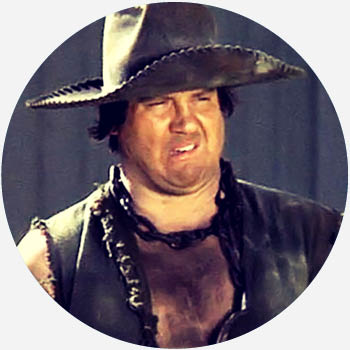

In [38]:
from IPython.display import Image

results = newcol.find_one({'_id': _})
newimg = results.get('image')

len(newimg)
Image(newimg)
#with open('/Users/johnmaxbarry/Downloads/mongo.jpg', 'wb') as f:
#    f.write(newimg)


In [96]:
# Wikipedia

In [97]:
db_wikipedia = client['wikipedia']

In [99]:
client.list_database_names()

['admin', 'config', 'example_data', 'example_database', 'local', 'test']

In [102]:
coll = db_wikipedia['baking']

In [103]:
client.list_database_names()

['admin', 'config', 'example_data', 'example_database', 'local', 'test']

In [104]:
import requests

bread = requests.get('https://en.wikipedia.org/wiki/Bread')
bread_src = bread.content

In [109]:
bread_data = {'name': 'bread', 'src': 'bread_src'}
coll.insert_one(bread_data)

In [119]:
record_to_update = {'name': 'bread'}
update_values = {'$set': {'src': bread_src}}
coll.update_many(record_to_update, update_values)


In [120]:
for x in coll.find({'name': 'bread'}):
    print(x)

{'_id': ObjectId('5d67d4345dfeb267a41572fc'), 'name': 'bread', 'src': b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Bread - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Bread","wgTitle":"Bread","wgCurRevisionId":912941129,"wgRevisionId":912941129,"wgArticleId":36969,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Pages using web citations with no URL","Wikipedia indefinitely semi-protected pages","Articles with short description","Use dmy dates from October 2017","Pages using deprecated image syntax","Pages using multiple image with auto scaled images","Wikipedia articles with GND identifiers","Wikipedia articles with NARA iden